<a href="https://colab.research.google.com/github/carolina-garay/Diplodatos_2022_Garay/blob/AutoML/Practico_An_Sup_Grupo_32_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DiploDatos Kaggle Competition

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.


##<font color='blue'>**Grupo 32**</font>


<font color='blue'>Integrantes:

- Garay, Carolina del Valle
- Ormaechea, Sebastián Gabriel
- Ramos, Pablo Nicolás 
</font>

En esta competencia, el objetivo es predecir si los pasajeros del conjunto de datos "test.csv" fueron transportados a una dimensión alternativa durante la colisión de la nave espacial Titanic con una anomalía del espacio-tiempo. Para ayudarlos a hacer estas predicciones, se les proporciona el conjunto de datos de los registros personales recuperados de la computadora dañada de la nave

train.csv Datos sobre gran parte de los pasajeros, a ser usados para entrenamiento.

-PassengerId - Un identificador para cada pasajero.

-HomePlanet - El planeta del cual partió el pasajero. Típicamente su planeta de residencia permanente.

-CryoSleep - Indica si el pasajero fue electo a ser puesto en suspensión animada durante la duración del viaje. Los pasajeros en CryoSleep están confinados a sus cabinas.

-Cabin - El número de cabina en donde el pasajero se está quedando. Toma la forma piso/número/lado, donde el lado puede ser P por Port oS por Starboard.

-Destination - El destino en donde va a desembarcar el pasajero.

-Age - La edad del pasajero.

-VIP - Si el pasajero pagó por servicios VIP durante el viaje.

-RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Cantidad que el pasajero ha gastado en cada una de las comodidades de lujo del Spaceship Titanic.

-Name - El nombre y apellido de cada pasajero.

-Transported - Si el pasajero fue transportado a otra dimensión o no. Esta es la columna target, la columna a predecir.

test.csv Records personales de los restantes pasajeros, a ser utilizados como datos nuevos desconocidos. Tu objetivo es predecir si cada pasajero de este conjunto fue transportado a otra dimensión o no (variable "Transported").

Deben subir el siguiente archivo: sample_submission.csv El archivo que deben entregar con las predicciones del conjunto test.csv . Debe tener dos columnas, una con el "PassengerId" y otra con el valor de la predicción en la columna "Transported" (0 si no fue transportado y 1 si fue transportado).

En el github de la materia hay un ejemplo de baseline para esta competencia.

Presentamos un código creado como ejemplo de base para la competición.

Deben:

Explorar los datos y aprender de ellos. Probar diferentes modelos y ver cuáles ajustan mejor dado los datos. Obtener una accuracy mejor que la que se presenta en este ejemplo. Tratar de obtener la accuracy más alta posible! Discutir la elección de modelo. El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

##<font color='blue'>**Análisis Exploratorio y Curación de datos**

En esta etapa se realizó una exploración de la base de datos a fin de determinar las mejores opciones de curación y conocer el comportamiento de las variables frente a la variable objetivo. La ejecución de los métodos de curación, permitió acondicionar los datos previo a la etapa de modelado.

<font color='blue'>**Actividades de exploración:**

*   Corroboración de registros duplicados
*   Inspección de outliers y datos anómalos mediante gráficas boxplot
*   Inspección de datos faltantes y analisis de correspondencia, mediante métodos gráficos de librería missingno
*   Evaluación gráfica de la relación de las variables cuantitativas y cualitativas frente al target, mediante gráficas relplot y crosstab

<font color='blue'>**Interpretación del análisis exploratorio:**

No se encontraron registros duplicados ni datos anómalos. Los outliers visibles mediante boxplot, se encontraron dentro del rango esperado por lo que se conservaron para el análisis posterior. Se encontraron bajos porcentajes de datos faltantes y sin correspondencia entre variables. El análisis de la relación entre las variables explicativas y el target, no detectó ninguna que explique en forma definitiva el comportamiento de la variable respuesta (Transportados-No transportados). Se observó una correlación relevante solo entre dos pares de categorías correspondientes a las variables "Destination" y "Lado". Esta última variable, deriva de la variable original "Cabin".


<font color='blue'>**Actividades de curación o preprocesamiento de datos:**

*   Subdivisión de la columna "Cabin" para poder utilizar sus características como variables independientes
*   Imputación de valores faltantes en variables categóricas y booleanas mediante SipmpleImputer y el valor más frecuente
*   Imputación de valores faltantes en variables cuantitativas mediante K-Nearest Neighbours
*   Escalamiento de datos cuantitativos mediante Robust Scaler para controlar outliers
*   Codificación de datos categóricos mediante creación de nuevas columnas binarias con la herramienta pd.get_dummies
*   Evaluación de la correlación post-curación entre variables mediante heatmap
*   Evaluación de la capacidad predictiva de las variables post-curación mediante SelectKBest de Scikit-learn













##<font color='blue'>**Planteo de modelos**

Para esta tarea se aplicó una selección multimodelos considerando progresivamente los siguientes criterios:

1.   Se probaron varios modelos bajo parámetros por defecto
2.   Se consideró el análisis de correlación de variables y en base a ello se eliminó progresivamente primero una y después dos variables
1.   Basado en la evaluación de la capacidad predictiva de las variables, se eliminó primero la de menor capacidad predictiva y luego las dos de menor capacidad predictiva.
2.   Se aplicó un Random Search, considerando todas las variables y diferentes combinaciones de parámetros. 
1.   Se probó un Grid Search solo sobre el algoritmo LGBClassifier ya que fue el que mostró mejor performance. 
2.   Dado que Grid Search no aportó información relevante, se realizaron numerosas pruebas a mano a fin de encontrar la mejor combinación de hiperparámetros, incluido la prueba de distintas semillas. 


##<font color='blue'>**Interpretación de resultados**

El uso de los modelos con parámetros por defecto permitió desde el principio tener un baseline comparativo. Luego, las pruebas en base a correlación de variables y capacidad predictiva, no tuvieron efectos mejoradores en la performance de los modelos. Tampoco el uso de Random Search, incrementó el score de los modelos. Cabe destacar, que también se realizaron pruebas con Grid Search que no mostraron mejoras y además requerían varias horas de procesado. Dado los resultados anteriores, nos decantamos por el algoritmo LGBClassifier. Sobre este se realizaron suscesivas pruebas que permitieron obtener el mejor modelo contemplando la performance sobre el conjunto de test. Sin embargo, los resultados no fueron los esperados al enviarlo a la competencia de Kaggle. Por ello, continuamos haciendo pruebas con otros modelos y el uso del algoritmo Extra Tree Classiffier fue el que alcanzó el mejor resultado en Kaggle de los que hemos enviado.   

##<font color='blue'>**Desarrollo**

In [1]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 3s (386 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEn

In [39]:
import autosklearn.classification

time: 884 µs (started: 2022-12-04 00:57:36 +00:00)


In [4]:
!pip install ipython-autotime
%load_ext autotime
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier as ETC

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 3.9 MB/s 
time: 166 ms (started: 2022-12-04 00:17:52 +00:00)


In [7]:
# Descarga de base de datos
!gdown https://drive.google.com/file/d/1Vclyh1LeOGSDe7Mxi-StHiGXgE5pdSkL/view?usp=sharing --fuzzy

!gdown https://drive.google.com/file/d/1YoAh1JANoRAKQr5zIFDeIAPY4fWbF1QW/view?usp=sharing --fuzzy


Downloading...
From: https://drive.google.com/uc?id=1Vclyh1LeOGSDe7Mxi-StHiGXgE5pdSkL
To: /content/train.csv
100% 681k/681k [00:00<00:00, 128MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YoAh1JANoRAKQr5zIFDeIAPY4fWbF1QW
To: /content/test.csv
100% 74.2k/74.2k [00:00<00:00, 65.7MB/s]
time: 5.58 s (started: 2022-12-04 00:21:44 +00:00)


In [8]:
# Carga del dataset y primera visualización
df = pd.read_csv('train.csv')
pd.options.display.float_format = "{:.1f}".format
print(df.shape)
df.describe()

(7823, 14)


,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7823.0,7661.0,7669.0,7668.0,7635.0,7665.0,7654.0,7823.0
mean,4345.7,28.9,226.1,455.6,172.6,305.0,295.5,0.5
std,2504.6,14.5,679.2,1621.3,597.9,1133.4,1093.5,0.5
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2182.5,19.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4345.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,6515.5,38.0,44.0,69.0,28.0,58.0,46.0,1.0
max,8692.0,79.0,14327.0,29813.0,23492.0,22408.0,24133.0,1.0


time: 83.8 ms (started: 2022-12-04 00:21:53 +00:00)


In [9]:
# Revisamos si hay registros duplicados y encontramos que no hay ninguno
df.duplicated().any()

False

time: 24.1 ms (started: 2022-12-04 00:22:00 +00:00)


In [10]:
# Subdivisión del dataset entre variables predictoras (X) y target(y). 
y = df.Transported
X = df.drop('Transported',axis=1)

time: 4.41 ms (started: 2022-12-04 00:22:03 +00:00)


In [11]:
#Subdividimos la columna Cabin para poder utilizar sus características como variables independientes
X[['Piso','Num', "Lado"]] = X.Cabin.str.split('/',expand=True)

time: 21.9 ms (started: 2022-12-04 00:22:06 +00:00)


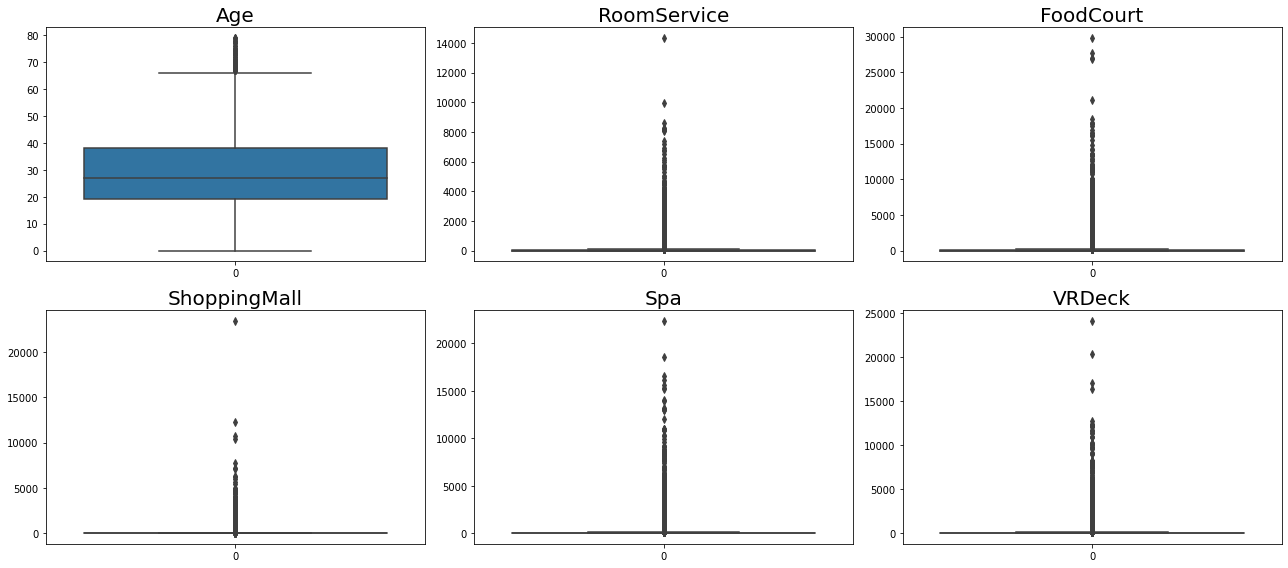

time: 1.13 s (started: 2022-12-04 00:22:09 +00:00)


In [12]:
# Evaluamos presencia de outliers en la variable edad y en las de gastos realizados. No se encuentran outliers que impliquen datos erróneos

fig, axes = plt.subplots(2,3,figsize=(18,8))
sns.boxplot(data=X['Age'], ax=axes[0,0])
axes[0,0].set_title('Age', fontsize=20)
sns.boxplot(data=X['RoomService'], ax=axes[0,1])
axes[0,1].set_title('RoomService', fontsize=20)
sns.boxplot(data=X['FoodCourt'], ax=axes[0,2])
axes[0,2].set_title('FoodCourt', fontsize=20)
sns.boxplot(data=X['ShoppingMall'], ax=axes[1,0])
axes[1,0].set_title('ShoppingMall', fontsize=20)
sns.boxplot(data=X['Spa'], ax=axes[1,1])
axes[1,1].set_title('Spa', fontsize=20)
sns.boxplot(data=X['VRDeck'], ax=axes[1,2])
axes[1,2].set_title('VRDeck', fontsize=20)
plt.tight_layout()

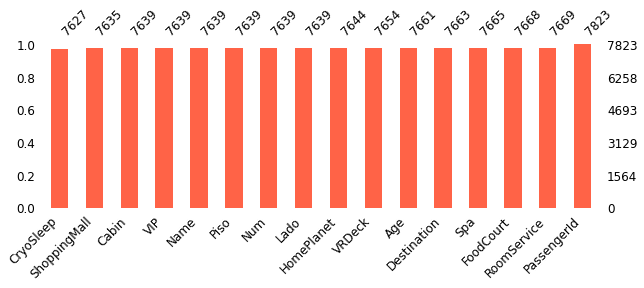

time: 1.19 s (started: 2022-12-04 00:22:15 +00:00)


In [13]:
# Análisis de datos faltantes mediante missingno
# Graficamos datos faltantes de algunas variables, incluidas las de interés. Observamos que hay valores faltantes pero representan un porcentaje bajo del total
msno.bar(X,figsize=(10, 3), sort="ascending",fontsize=12, color='tomato')

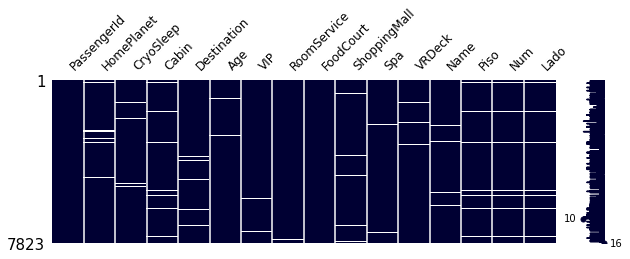

time: 426 ms (started: 2022-12-04 00:22:20 +00:00)


In [14]:
# Analizamos si hay una correlación o correspondencia entre los datos faltantes con la siguiente gráfica.
# Vemos que no hay correspondencia por lo que la falta de valores no obedece a una misma causa y puede ser aleatoria
# Como excepción, se observa la correspondencia de las variables Piso, Num y Lado, lo cual era esperable dado que provienen de la subdivisión de Cabin 
msno.matrix(X,figsize=(10, 3), fontsize=12, color=[0,0,0.2])

In [15]:
# Convertimos las variables a un dtype conveniente
X[["HomePlanet", "CryoSleep", "Destination", "VIP", 'Piso', "Lado"]]  = X[["HomePlanet", "CryoSleep", "Destination", "VIP", 'Piso', "Lado"]].astype("category")
X[["Num"]]  = X[["Num"]].astype("float")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   7823 non-null   int64   
 1   HomePlanet    7644 non-null   category
 2   CryoSleep     7627 non-null   category
 3   Cabin         7639 non-null   object  
 4   Destination   7663 non-null   category
 5   Age           7661 non-null   float64 
 6   VIP           7639 non-null   category
 7   RoomService   7669 non-null   float64 
 8   FoodCourt     7668 non-null   float64 
 9   ShoppingMall  7635 non-null   float64 
 10  Spa           7665 non-null   float64 
 11  VRDeck        7654 non-null   float64 
 12  Name          7639 non-null   object  
 13  Piso          7639 non-null   category
 14  Num           7639 non-null   float64 
 15  Lado          7639 non-null   category
dtypes: category(6), float64(7), int64(1), object(2)
memory usage: 658.1+ KB
time: 42.9 ms (started: 

Text(0.5, 1.05, 'VRDeck')

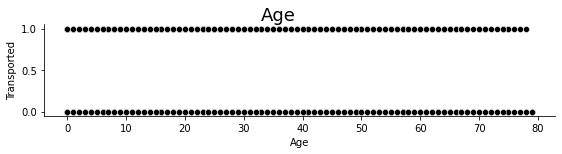

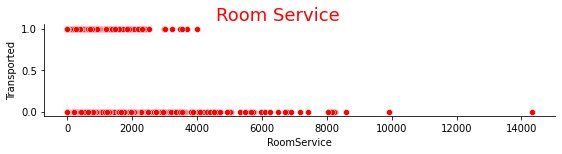

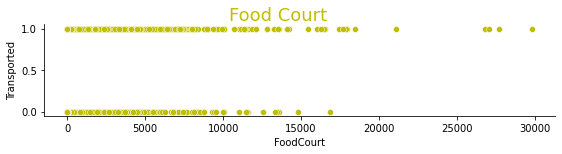

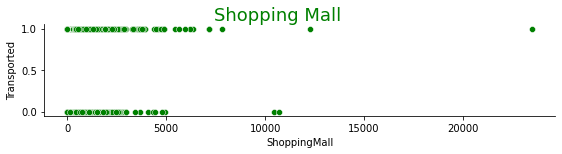

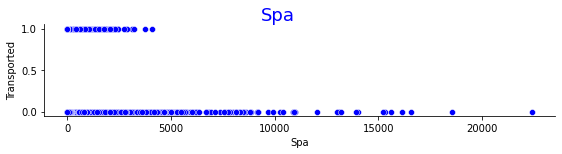

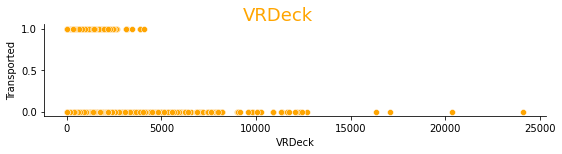

time: 2.23 s (started: 2022-12-04 00:22:28 +00:00)


In [16]:
# Visualizamos la relación de las variables cuantitativas con el target
Age = sns.relplot(y=y, x=X.Age,height=2, aspect=4, color="black"); Age.fig.suptitle('Age', fontsize=18, y=1.05) 
Room = sns.relplot(y=y, x=X.RoomService,height=2, aspect=4, color="r"); Room.fig.suptitle("Room Service", fontsize=18, y=1.05, color="r")
Food = sns.relplot(y=y, x=X.FoodCourt,height=2, aspect=4, color="y"); Food.fig.suptitle("Food Court", fontsize=18, y=1.05, color="y")
Shop = sns.relplot(y=y, x=X.ShoppingMall,height=2, aspect=4, color="g"); Shop.fig.suptitle("Shopping Mall", fontsize=18, y=1.05, color="g")
Spa = sns.relplot(y=y, x=X.Spa,height=2, aspect=4, color="b"); Spa.fig.suptitle("Spa", fontsize=18, y=1.05, color="b")
VRDeck = sns.relplot(y=y, x=X.VRDeck,height=2, aspect=4, color="orange"); VRDeck.fig.suptitle("VRDeck", fontsize=18, y=1.05, color="orange")

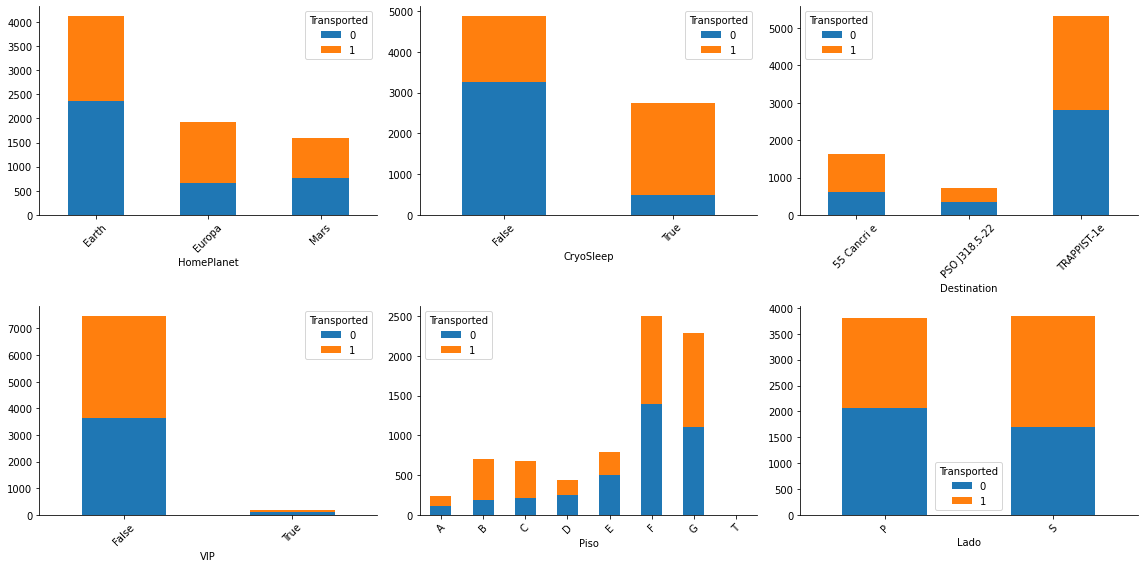

time: 1.31 s (started: 2022-12-04 00:22:36 +00:00)


In [17]:
# Visualizamos la relación de las variables categóricas y binarias con el target
fig, axes = plt.subplots(2,3,figsize=(16,8))
pd.crosstab(X.HomePlanet,y).plot.bar(stacked=True, ax=axes[0,0], rot=45)
pd.crosstab(X.CryoSleep,y).plot.bar(stacked=True, ax=axes[0,1], rot=45)
pd.crosstab(X.Destination,y).plot.bar(stacked=True, ax=axes[0,2], rot=45)
pd.crosstab(X.VIP,y).plot.bar(stacked=True, ax=axes[1,0], rot=45)
pd.crosstab(X.Piso,y).plot.bar(stacked=True, ax=axes[1,1], rot=45)
pd.crosstab(X.Lado,y).plot.bar(stacked=True, ax=axes[1,2], rot=45)
plt.tight_layout(); sns.despine()

In [18]:
# Dividimos el dataset antes de la imputación y el escalamiento para evitar el data leakage
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

time: 11.3 ms (started: 2022-12-04 00:22:50 +00:00)


In [19]:
# Imputamos valores faltantes en las columnas categóricas y booleanas con el valor más frecuente. TRAIN DATASET
imputer = SimpleImputer(strategy="most_frequent")
x_train[["HomePlanet", "Destination", 'Piso', "Lado", "CryoSleep", "VIP"]] = imputer.fit_transform(x_train[["HomePlanet", "Destination", 'Piso', "Lado", "CryoSleep", "VIP"]])
x_train.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Piso,Num,Lado
4320,5890,Earth,True,G/1010/S,PSO J318.5-22,33.0,False,0.0,0.0,0.0,0.0,0.0,Holey Maystuarey,G,1010.0,S
1437,3770,Earth,True,NaN,TRAPPIST-1e,10.0,False,0.0,0.0,0.0,0.0,0.0,Luise Carpennels,F,NaN,S
1690,8070,Earth,False,F/1664/S,PSO J318.5-22,49.0,False,0.0,18.0,0.0,0.0,686.0,Enry Johnsondez,F,1664.0,S
3525,4575,Mars,False,F/927/S,TRAPPIST-1e,25.0,False,750.0,0.0,109.0,368.0,0.0,Teda Ane,F,927.0,S
4700,699,Earth,False,NaN,TRAPPIST-1e,19.0,False,0.0,714.0,2.0,0.0,0.0,Jilla Bairdford,F,NaN,S


time: 40.5 ms (started: 2022-12-04 00:22:56 +00:00)


In [20]:
# Imputamos valores faltantes en las columnas cuantitativas con KNN. TRAIN DATASET
Qcols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
from sklearn.impute import KNNImputer
imputerKNN = KNNImputer()
x_train[Qcols] = imputerKNN.fit_transform(x_train[Qcols])

time: 553 ms (started: 2022-12-04 00:23:02 +00:00)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Piso,Num,Lado
4320,5890,Earth,True,G/1010/S,PSO J318.5-22,33.0,False,0.0,0.0,0.0,0.0,0.0,Holey Maystuarey,G,1010.0,S
1437,3770,Earth,True,NaN,TRAPPIST-1e,10.0,False,0.0,0.0,0.0,0.0,0.0,Luise Carpennels,F,NaN,S
1690,8070,Earth,False,F/1664/S,PSO J318.5-22,49.0,False,0.0,18.0,0.0,0.0,686.0,Enry Johnsondez,F,1664.0,S
3525,4575,Mars,False,F/927/S,TRAPPIST-1e,25.0,False,750.0,0.0,109.0,368.0,0.0,Teda Ane,F,927.0,S
4700,699,Earth,False,NaN,TRAPPIST-1e,19.0,False,0.0,714.0,2.0,0.0,0.0,Jilla Bairdford,F,NaN,S


time: 20.4 ms (started: 2022-08-14 23:24:20 +00:00)


In [21]:
# Escalamos los datos cuantitativos mediante Robust Scaler para controlar outliers
from sklearn import preprocessing
escalador = preprocessing.RobustScaler()
x_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = escalador.fit_transform(x_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
x_train.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Piso,Num,Lado
4320,5890,Earth,True,G/1010/S,PSO J318.5-22,0.3,False,0.0,0.0,0.0,0.0,0.0,Holey Maystuarey,G,1010.0,S
1437,3770,Earth,True,NaN,TRAPPIST-1e,-0.9,False,0.0,0.0,0.0,0.0,0.0,Luise Carpennels,F,NaN,S
1690,8070,Earth,False,F/1664/S,PSO J318.5-22,1.2,False,0.0,0.3,0.0,0.0,13.2,Enry Johnsondez,F,1664.0,S
3525,4575,Mars,False,F/927/S,TRAPPIST-1e,-0.1,False,16.3,0.0,3.5,5.9,0.0,Teda Ane,F,927.0,S
4700,699,Earth,False,NaN,TRAPPIST-1e,-0.4,False,0.0,10.5,0.1,0.0,0.0,Jilla Bairdford,F,NaN,S


time: 35.3 ms (started: 2022-12-04 00:23:06 +00:00)


In [22]:
# Revisamos las variables categóricas antes de aplicar la codificación
print(x_train["HomePlanet"].value_counts())
print(x_train["Destination"].value_counts())
print(x_train["Piso"].value_counts())
print(x_train["Lado"].value_counts())

Earth     3454
Europa    1529
Mars      1275
Name: HomePlanet, dtype: int64
TRAPPIST-1e      4352
55 Cancri e      1324
PSO J318.5-22     582
Name: Destination, dtype: int64
F    2167
G    1829
E     636
B     549
C     535
D     355
A     183
T       4
Name: Piso, dtype: int64
S    3224
P    3034
Name: Lado, dtype: int64
time: 15.1 ms (started: 2022-12-04 00:23:11 +00:00)


In [23]:
# Aplicamos hot encoding a las categóricas mediante pd.get_dummies
x_train_hot = pd.get_dummies(data=x_train, columns=["HomePlanet", "Destination", 'Piso', "Lado"]).drop(columns=['Cabin', 'Num', 'Name'])
x_train_hot.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,...,Piso_A,Piso_B,Piso_C,Piso_D,Piso_E,Piso_F,Piso_G,Piso_T,Lado_P,Lado_S
4320,5890,True,0.3,False,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
1437,3770,True,-0.9,False,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,1
1690,8070,False,1.2,False,0.0,0.3,0.0,0.0,13.2,1,...,0,0,0,0,0,1,0,0,0,1
3525,4575,False,-0.1,False,16.3,0.0,3.5,5.9,0.0,0,...,0,0,0,0,0,1,0,0,0,1
4700,699,False,-0.4,False,0.0,10.5,0.1,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,1


time: 43.3 ms (started: 2022-12-04 00:23:16 +00:00)


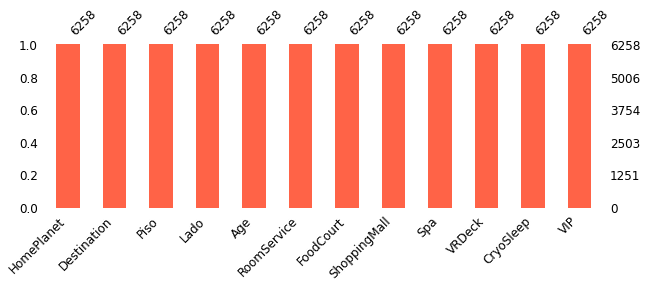

time: 1.04 s (started: 2022-12-04 00:23:19 +00:00)


In [24]:
# Verificamos que no haya valores faltantes en las columnas a utilizar para la predicción
interest_cols = ["HomePlanet", "Destination", 'Piso', "Lado", 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', "CryoSleep", "VIP"]
msno.bar(x_train[interest_cols],figsize=(10, 3), sort="ascending",fontsize=12, color='tomato')

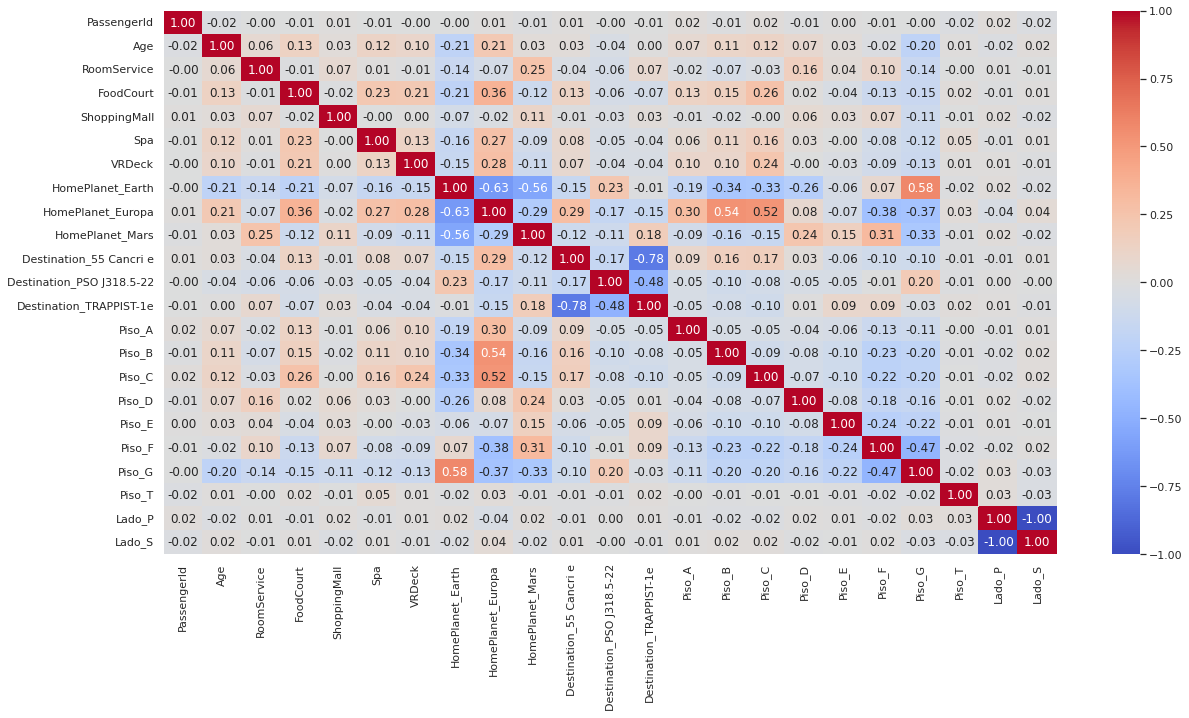

time: 2.96 s (started: 2022-12-04 00:23:24 +00:00)


In [25]:
# Analizamos e identificamos correlación de variables
plt.figure(figsize = (20,10))
sns.set(font_scale=1)
sns.heatmap(x_train_hot.corr(), annot = True, cmap = 'coolwarm', fmt=".2f")

In [26]:
# Identifico el ranking de capacidad predictora de las variables independientes en base a SelectKBest
features = np.array(x_train_hot.columns)
select = SelectKBest(score_func=f_classif, k=len(features))
z = select.fit_transform(x_train_hot,y_train)

scores_df = pd.DataFrame({"Feature": features, "Score": select.scores_}).sort_values(["Score"], ascending = [False])
scores_df

,Feature,Score
1,CryoSleep,1714.3
4,RoomService,403.2
7,Spa,304.4
8,VRDeck,294.4
10,HomePlanet_Europa,193.9
9,HomePlanet_Earth,165.7
16,Piso_B,133.4
12,Destination_55 Cancri e,84.1
17,Piso_C,76.2
14,Destination_TRAPPIST-1e,71.0


time: 41.2 ms (started: 2022-12-04 00:23:32 +00:00)


In [27]:
# Transformaciones sobre el TEST DATASET
# Imputamos valores faltantes en las columnas categóricas y booleanas con el valor más frecuente.
imputer = SimpleImputer(strategy="most_frequent")
x_test[["HomePlanet", "Destination", 'Piso', "Lado", "CryoSleep", "VIP"]] = imputer.fit_transform(x_test[["HomePlanet", "Destination", 'Piso', "Lado", "CryoSleep", "VIP"]])
# Imputamos valores faltantes en las columnas cuantitativas con KNN. 
Qcols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
imputerKNN = KNNImputer()
x_test[Qcols] = imputerKNN.fit_transform(x_test[Qcols])

# Escalamiento
escalador = preprocessing.RobustScaler()
x_test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = escalador.fit_transform(x_test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

# Hot encoding a las categóricas
x_test_hot = pd.get_dummies(data=x_test, columns=["HomePlanet", "Destination", 'Piso', "Lado"]).drop(columns=['Cabin', 'Num', 'Name'])
x_test.shape

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

(1565, 16)

time: 83.5 ms (started: 2022-12-04 00:23:40 +00:00)


### Planteo modelos
Tienen que elegir los 2 mejores modelos así que prueben con varios.

<font color='blue'>Aplicamos una selección multimodelos en base a: https://blog.escueladedatosvivos.ai/como-hacer-optimizacion-parametros-python/. 
Los resultados de cada prueba, se calaculan sobre el conjunto de test y se muestran progresivamente en una tabla comparativa

In [28]:
# Acondicionamiento de detalles en ambos datasets por requerimientos de los siguientes métodos a utilizar
x_train_hot = x_train_hot.drop(columns=['Piso_T']) #Tuve que eliminar esta columna porque estaba ausente en el conjunto de test
print(x_train_hot.shape)
print(x_test_hot.shape)
x_train_hot[["CryoSleep", "VIP"]] = x_train_hot[["CryoSleep", "VIP"]].astype("float64")
x_test_hot[["CryoSleep", "VIP"]] = x_test_hot[["CryoSleep", "VIP"]].astype("float64")

(6258, 24)
(1565, 24)
time: 16.1 ms (started: 2022-12-04 00:23:50 +00:00)


In [40]:
automl =autosklearn.classification.AutoSklearnClassifier()

time: 1.09 ms (started: 2022-12-04 00:59:24 +00:00)


In [41]:
automl.fit(x_train_hot,y_train)

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      per_run_time_limit=360)

time: 1h 4s (started: 2022-12-04 01:00:03 +00:00)


In [43]:
train_predictions = automl.predict(x_train_hot)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))

#test_predictions = automl.predict(x_test)
#accuracy = accuracy_score(y_test, test_predictions)
#print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))

Accuracy train Arbol de decisión: 85.30%
time: 12.5 s (started: 2022-12-04 02:45:54 +00:00)


In [29]:
# Creación de dataframe de resultados
cols = ['Case','SGD','Ridge','KNN','SVM','Bagging','RndForest','LogReg','LGB']
resul = pd.DataFrame(columns=cols)
resul.set_index("Case",inplace=True)
resul.loc['Standard'] = [0,0,0,0,0,0,0,0]
resul.loc['Correlacion_1'] = [0,0,0,0,0,0,0,0]
resul.loc['Correlacion_2'] = [0,0,0,0,0,0,0,0]
resul.loc['Cap_pred_1'] = [0,0,0,0,0,0,0,0]
resul.loc['Cap_pred_2'] = [0,0,0,0,0,0,0,0]
resul.loc['RandomSearch'] = [0,0,0,0,0,0,0,0]
resul.style.format("{:.3f}")

,SGD,Ridge,KNN,SVM,Bagging,RndForest,LogReg,LGB
Case,,,,,,,,
Standard,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Correlacion_1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Correlacion_2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Cap_pred_1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Cap_pred_2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
RandomSearch,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


time: 80.6 ms (started: 2022-12-04 00:24:03 +00:00)


In [ ]:
# Primera prueba de selección multimodelos con parámetros por defecto
seed = 42
#Creación de Modelos
sgd   = SGDClassifier(random_state=seed)
ridge = RidgeClassifier(random_state=seed)
knn   = KNeighborsClassifier()
svc   = SVC(gamma='auto', random_state=seed)
bag   = BaggingClassifier(random_state=seed)
rf    = RandomForestClassifier(n_estimators=10, random_state=seed)
lr    =  LogisticRegression(solver='liblinear', random_state=seed)
lgg   = lgb.LGBMClassifier(random_state=seed)

models = [sgd,ridge,knn,svc,bag,rf,lr,lgg]

col = 0
for model in models:
    model.fit(x_train_hot,y_train.values.ravel())
    resul.iloc[0,col] = model.score(x_test_hot,y_test)
    col += 1

resul.style.format("{:.3f}")

,SGD,Ridge,KNN,SVM,Bagging,RndForest,LogReg,LGB
Case,,,,,,,,
Standard,0.780,0.772,0.654,0.685,0.792,0.787,0.792,0.814
Correlacion_1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Correlacion_2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Cap_pred_1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Cap_pred_2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
RandomSearch,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


time: 11.4 s (started: 2022-08-14 23:24:28 +00:00)


In [ ]:
# Pruebas con eliminación de las variables más correlacionadas
# Creamos dataset específicos 
x_train_corr_1 = x_train_hot.drop(columns=['Lado_S'])
x_test_corr_1 = x_test_hot.drop(columns=['Lado_S'])

x_train_corr_2 = x_train_hot.drop(columns=['Lado_S', 'Destination_TRAPPIST-1e'])
x_test_corr_2 = x_test_hot.drop(columns=['Lado_S', 'Destination_TRAPPIST-1e'])

col = 0
for model in models:
    model.fit(x_train_corr_1,y_train.values.ravel())
    resul.iloc[1,col] = model.score(x_test_corr_1,y_test)
    col += 1

col = 0
for model in models:
    model.fit(x_train_corr_2,y_train.values.ravel())
    resul.iloc[2,col] = model.score(x_test_corr_2,y_test)
    col += 1

resul.style.format("{:.3f}")

,SGD,Ridge,KNN,SVM,Bagging,RndForest,LogReg,LGB
Case,,,,,,,,
Standard,0.780,0.772,0.654,0.685,0.792,0.787,0.792,0.814
Correlacion_1,0.794,0.772,0.654,0.681,0.791,0.784,0.792,0.814
Correlacion_2,0.484,0.772,0.654,0.680,0.787,0.797,0.792,0.816
Cap_pred_1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Cap_pred_2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
RandomSearch,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


time: 18.7 s (started: 2022-08-14 23:24:39 +00:00)


In [ ]:
# Pruebas con eliminación de las variables con menos capacidad predictiva
# Creamos dataset específicos 
x_train_cap_1 = x_train_hot.drop(columns=['Destination_PSO J318.5-22'])
x_test_cap_1 = x_test_hot.drop(columns=['Destination_PSO J318.5-22'])

x_train_cap_2 = x_train_hot.drop(columns=['Destination_PSO J318.5-22', 'Piso_A'])
x_test_cap_2 = x_test_hot.drop(columns=['Destination_PSO J318.5-22', 'Piso_A'])

col = 0
for model in models:
    model.fit(x_train_cap_1,y_train.values.ravel())
    resul.iloc[3,col] = model.score(x_test_cap_1,y_test)
    col += 1

col = 0
for model in models:
    model.fit(x_train_cap_2,y_train.values.ravel())
    resul.iloc[4,col] = model.score(x_test_cap_2,y_test)
    col += 1

resul.style.format("{:.3f}")

,SGD,Ridge,KNN,SVM,Bagging,RndForest,LogReg,LGB
Case,,,,,,,,
Standard,0.780,0.772,0.654,0.685,0.792,0.787,0.792,0.814
Correlacion_1,0.794,0.772,0.654,0.681,0.791,0.784,0.792,0.814
Correlacion_2,0.484,0.772,0.654,0.680,0.787,0.797,0.792,0.816
Cap_pred_1,0.780,0.772,0.655,0.681,0.794,0.783,0.792,0.815
Cap_pred_2,0.780,0.773,0.655,0.678,0.794,0.790,0.792,0.806
RandomSearch,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


time: 9.71 s (started: 2022-08-14 23:24:58 +00:00)


In [ ]:
# Definición de grillas de hiperparámetros para la aplicación de RandomSearch

#SGD
loss = ['hinge', 'modified_huber', 'log']
penalty = ['l1','l2']
alpha= [0.0001,0.01,0.1]
l1_ratio= [0.15,0.05,.025]
max_iter = [100,1000,10000]
sgd_grid = dict(loss=loss,penalty=penalty,max_iter=max_iter,alpha=alpha,l1_ratio=l1_ratio)

#Ridge
alpha = [0.1, 0.5, 1.0]
ridge_grid = dict(alpha=alpha)

#K-Nearest - Neighborg
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
knn_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

#Support Vector Classifier
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 1.0, 0.01]
gamma = ['scale']
svc_grid = dict(kernel=kernel,C=C,gamma=gamma)

#Bagging Classifier
n_estimators = [10, 100, 1000]
bag_grid = dict(n_estimators=n_estimators)

#Random Forest
n_estimators = [10, 1000,10000]
max_features = ['sqrt', 'log2']
rf_grid = dict(n_estimators=n_estimators,max_features=max_features)

#Logistic Regression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 1.0, 0.01]
lr_grid = dict(solver=solvers,penalty=penalty,C=c_values)

#LGB
class_weight = [None,'balanced']
boosting_type = ['gbdt', 'goss', 'dart']
num_leaves = [30,100,150] #list(range(30, 150)),
learning_rate = list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 10)) #1000
lgg_grid = dict(class_weight=class_weight, boosting_type=boosting_type, num_leaves=num_leaves, learning_rate =learning_rate)

time: 40.9 ms (started: 2022-08-14 23:25:07 +00:00)


In [ ]:
grids = [sgd_grid,ridge_grid,knn_grid,svc_grid,bag_grid,rf_grid,lr_grid,lgg_grid]
col = 0

# Aplicamos RandomSearchCV
col = 0
for ind in range(0,len(models)):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, 
                                 random_state=1)
    n_iter_search = 3
    random_search = RandomizedSearchCV(models[col],
    param_distributions=grids[col],n_iter=n_iter_search, cv=cv)
    random_search.fit(x_train_hot,y_train)
    resul.iloc[5,col] = random_search.score(x_test_hot,y_test)
    col += 1
    
resul.style.format("{:.3f}")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

,SGD,Ridge,KNN,SVM,Bagging,RndForest,LogReg,LGB
Case,,,,,,,,
Standard,0.780,0.772,0.654,0.685,0.792,0.787,0.792,0.814
Correlacion_1,0.794,0.772,0.654,0.681,0.791,0.784,0.792,0.814
Correlacion_2,0.484,0.772,0.654,0.680,0.787,0.797,0.792,0.816
Cap_pred_1,0.780,0.772,0.655,0.681,0.794,0.783,0.792,0.815
Cap_pred_2,0.780,0.773,0.655,0.678,0.794,0.790,0.792,0.806
RandomSearch,0.788,0.772,0.673,0.674,0.794,0.805,0.795,0.803


time: 1h 44min 26s (started: 2022-08-14 23:25:07 +00:00)


In [ ]:
# Luego de las pruebas previas, se decidió trabajar solo con el algoritmo LGB y experimentar con diferentes hiperparámetros
# La mejor combinación de hiperparámetros se presenta a continuación y contempla el uso de todas las variables predictoras
Best_LGB = lgb.LGBMClassifier(random_state=22,n_estimators=697, boosting_type='gbdt', 
        learning_rate=0.01, num_leaves = 32)
                     
Best_LGB.fit(x_train_hot, y_train)
print("Train dataset accuracy: %0.03f" % Best_LGB.score(x_train_hot,y_train))
print("Test dataset accuracy: %0.03f" % Best_LGB.score(x_test_hot,y_test))

Train dataset accuracy: 0.871
Test dataset accuracy: 0.824
time: 2.04 s (started: 2022-08-15 01:09:34 +00:00)


In [ ]:
# No obstante todo lo anterior, se hicieron muchas pruebas con distintos modelos buscando la mejor performance
# A continuación se presenta el modelo que alcanzó el mejor resultado del Grupo 32 en la competencia Kaggle
Best_ETC = ETC(criterion='entropy', max_features=12,
                     min_samples_leaf=3, min_samples_split=49, n_estimators=29, n_jobs=4,
                     random_state=517)
Best_ETC.fit(x_train_hot, y_train)
print("Train dataset accuracy: %0.03f" % Best_ETC.score(x_train_hot,y_train))
print("Test dataset accuracy: %0.03f" % Best_ETC.score(x_test_hot,y_test))

Train dataset accuracy: 0.843
Test dataset accuracy: 0.810
time: 902 ms (started: 2022-08-15 01:47:23 +00:00)


## Generar la salida para entregar

In [ ]:
test_df = pd.read_csv('test.csv')

time: 24.7 ms (started: 2022-08-15 01:09:36 +00:00)


In [ ]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive


time: 18.7 ms (started: 2022-08-15 01:09:37 +00:00)


In [ ]:
# Transformaciones sobre el DATASET PARA ENVIAR
#Subdividimos la columna Cabin para poder utilizar sus características como variables independientes
test_df[['Piso','Num', "Lado"]] = test_df.Cabin.str.split('/',expand=True)

# Convertimos las variables a un dtype conveniente
test_df[["HomePlanet", "CryoSleep", "Destination", "VIP", 'Piso', "Lado"]]  = test_df[["HomePlanet", "CryoSleep", "Destination", "VIP", 'Piso', "Lado"]].astype("category")

# Imputamos valores faltantes en las columnas categóricas y booleanas con el valor más frecuente.
imputer = SimpleImputer(strategy="most_frequent")
test_df[["HomePlanet", "Destination", 'Piso', "Lado", "CryoSleep", "VIP"]] = imputer.fit_transform(test_df[["HomePlanet", "Destination", 'Piso', "Lado", "CryoSleep", "VIP"]])
# Imputamos valores faltantes en las columnas cuantitativas con KNN. 
Qcols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
imputerKNN = KNNImputer()
test_df[Qcols] = imputerKNN.fit_transform(test_df[Qcols])

# Escalamiento
escalador = preprocessing.RobustScaler()
test_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = escalador.fit_transform(test_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

# Hot encoding a las categóricas
test_df_hot = pd.get_dummies(data=test_df, columns=["HomePlanet", "Destination", 'Piso', "Lado"]).drop(columns=['Cabin', 'Num', 'Name'])

test_df_hot = test_df_hot.drop(columns=['Piso_T']) #Tuve que eliminar esta columna porque estaba ausente en el conjunto de test
print(test_df_hot.shape)
test_df_hot[["CryoSleep", "VIP"]] = test_df_hot[["CryoSleep", "VIP"]].astype("float64")

(870, 24)
time: 103 ms (started: 2022-08-15 01:09:37 +00:00)


Para poder evaluar nuestra predicción los datos de prueba deben tener exactamente el mismo tratamiento que los datos de entrenamiento

Generamos la salida

In [ ]:
test_df_cols = test_df_hot.drop(columns=["PassengerId"])
test_id = test_df_hot['PassengerId']

time: 8.03 ms (started: 2022-08-15 01:09:37 +00:00)


In [ ]:
test_pred = BestCaro.predict(test_df_hot)

time: 63.9 ms (started: 2022-08-15 01:09:37 +00:00)


In [ ]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("submission_G32_SGO.csv", header=True, index=False)

time: 29.9 ms (started: 2022-08-15 01:09:37 +00:00)


In [ ]:
submission.head()

,PassengerId,Transported
0,415,1
1,8663,1
2,4524,0
3,8246,0
4,2935,1


time: 15.5 ms (started: 2022-08-15 01:09:37 +00:00)
